# Numerical Methods Project: Vorticies in BEC with Harmonic Trap

The following inmplementation can be found on [GitHub](https://github.com/superporchetta/numerical_methods_project).

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os

# custom libraries with all the fucntions used
import plotting_tools as pt
import gross_pitaevskii as gp

All the function that are used to integrate the equations or to calculate phyisical meaningful quantities are contained in `gross_pitaevskii` while the file `plotting_tools` contains many useful functions to generate plots.

For a detailed discussion of the function paramethers we advice to look at the documentation in the function definitions.

In addition here we define some useful functions and variables for later use that will be used later on.

In [3]:
fx = lambda x, y: x
fy = lambda x, y: y
fx2 = lambda x, y: x**2
fy2 = lambda x, y: y**2

Many results from this notebooks can be saved in a subdirectory of the cwd called `test_imgs`. The following lines of code create the directory.

In [4]:
try:
    A = os.mkdir(os.getcwd() + "/test_imgs")
except FileExistsError as error:
    print('Folder {}/test_imgs already exist.'.format(os.getcwd()))
    
imgs_dir = os.getcwd() + "/test_imgs"

Folder /Users/matteovilucchio/Documents/ENS/Numerical Methods/numerical_methods_project/test_imgs already exist.


## Test of Algorithms from [1.]

The following tests are run like the example **2.I** (pg. 332) in the above mentioned paper.

In the use of this funciton the potential can depend on time (first and second argument are the coordinates and the third one is time). In the following exampe we are looking at the evolution of out initial condition on a constant potential (i.e. an harmonic trap).

In [10]:
x_range = [-8, 8]
eps = 1.0
beta = 2.0
dt = 0.001
dx = 1/32
T = 4.0
N = int(T / dt)
M = int((x_range[1]-x_range[0])/dx)
q = 40
Dt = q*dt

ho_potential = lambda x, y: 0.5*(x**2 + y**2)
f0 = lambda x, y: np.exp(-(x**2 + y**2)/(2*eps))/np.sqrt(np.pi*eps)

In the paper the authors start from a bidimensional gaussian as an initial conditon.

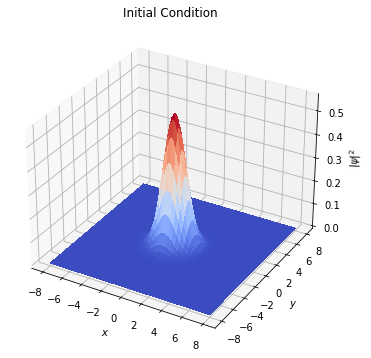

In [11]:
x_test = np.linspace(-8, 8, 100)
X_test, Y_test = np.meshgrid(x_test, x_test)
Z = f0(X_test, Y_test)
fig = pt.surface_plotter(X_test, Y_test, Z, title='Initial Condition', z_label=r'$|\psi|^2$', color_bar=False)

By running the initial condition with the above paramethers one has that the algorithm ...

In [12]:
start_time = time.time()
t, X, Y, psi = gp.ti_tssp_2d_pbc(M, N, q, x_range, x_range, f0, ho_potential, dt, beta, eps)
end_time = time.time()
print("--- Evaluated in {:.2f} seconds ---".format(end_time - start_time))

[##############################] 100%
--- Evaluated in 117.30 seconds ---


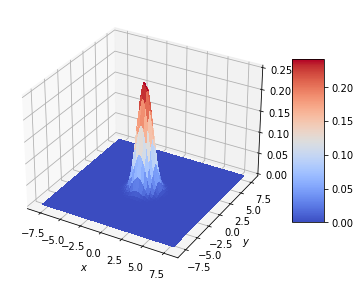

In [13]:
frame = -1
lst_fig = pt.surface_plotter(X, Y, np.abs(psi[frame])**2, title='', z_label=r'$|\psi|^2$')

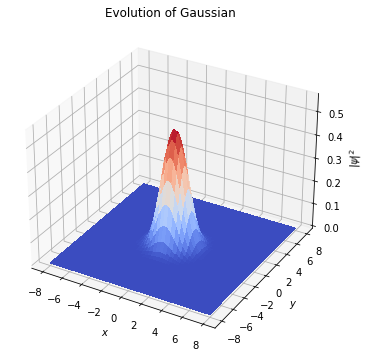

In [14]:
evolution_animation = pt.surface_animate(X, Y, np.abs(psi), title='Evolution of Gaussian', z_label=r'$|\psi|^2$', show_plot=False)
evolution_animation.save('myAnimation.gif', writer='imagemagick', fps=30)

In the following we determine the variance of the condensate width in the $x$ and $y$ direction as:
$$
\sigma_x=\sqrt{\langle(x-\langle x \rangle)^2\rangle} \quad \sigma_y=\sqrt{\langle(y-\langle y \rangle)^2\rangle}
$$
where
$$
\langle f\rangle=\int_\mathbb{R^2} f(\vec{x}) |\psi(\vec{x},t)|^2 \: d\vec{x}
$$

In [15]:
sigma = np.array([np.sqrt(gp.mean_value_2d(fx2, psi[i], x_range, x_range, M) - gp.mean_value_2d(fx, psi[i], x_range, x_range, M)**2) 
                  for i in range(len(t))])

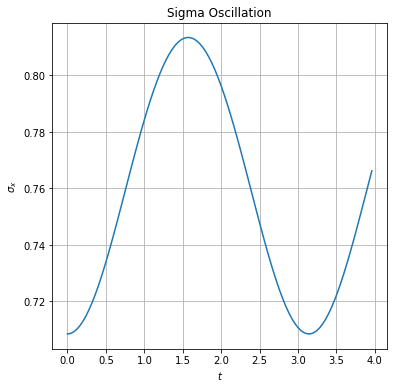

In [16]:
sigma_fig = pt.plane_plotter(t, sigma, title='Sigma Oscillation', x_label=r'$t$', y_label=r'$\sigma_x$')

In [21]:
sigma_fig.savefig(imgs_dir + "/sigma_oscillation.jpeg", dpi=300, format='jpeg')

From this paper we have also implemented, in the function `ti_tssp_1d_pbc`, the 1D implementation for the TSSP method applied to the Gross Pitaevskii equation.

By starting from an harmonic potential in 1D one has the following kind of behaviour.

In [ ]:
x_range = [-8, 8]
eps = 1.0
beta = 1.2649
dt = 0.0001
dx = 1/256
T = 10.0
N = int(T / dt)
M = int((x_range[1] - x_range[0]) / dx)
q = 40
Dt = q*dt

ho_potential_1D = lambda x: 0.5*x**2
f0_1D = lambda x: np.exp(-(x**2)/(2*eps))/(np.pi*eps)**(1/4)

In [ ]:
start_time = time.time()
t, x, psi = gp.ti_tssp_1d_pbc(M, N, q, x_range, f0_1D, ho_potential_1D, dt, beta, eps)
end_time = time.time()
print("--- Evaluated in {:.2f} seconds ---".format(end_time - start_time))

## Test of Algorithms from [2.]

The following tests are run like the example **4.3.I** (pg. 1689) in the above mentioned paper.

The only difference between our implementation of the algorithm and the implementation that can be found in [2.] is the choice of boundary condition. Though out this work we have chosen _periodic boundary conditions_ while in the paper the implementation of the algorithm is done with Dirichlet boundary conditions.

In [ ]:
M = 16*8
N = 10000
x_range = [-8, 8]
y_range = [-4, 4]
gx = 1
gy = 4
saving_time = 50
potential = lambda x, y: 0.5*(gx**2*x**2 + gy**2*y**2)
psi0 = lambda x, y: (gx*gy)**(1/4) * np.exp(-(gx**2*x**2+gy**2*y**2)/2) / np.pi**(1/2)
beta = 200.
dt = 0.001
eps = 1

In [ ]:
start_time = time.time()
t, X, Y, psi = gp.td_tssp_2d_pbc(M, N, saving_time, x_range, y_range, psi0, potential, dt, beta, eps)
end_time = time.time()
print("--- Evaluated in {:.2f} seconds ---".format(end_time - start_time))

In [ ]:
V = potential(X, Y)
x_spacing = (x_range[1] - x_range[0])/M
y_spacing = (y_range[1] - y_range[0])/M

E = np.empty(len(t))
for i in range(len(t)):
    E[i] = np.abs(gp.energy_gpe(psi[i], V, beta, eps, x_spacing, y_spacing))

In [ ]:
mu_g = gp.mu_gpe(psi[-1], V, beta, eps, x_spacing, y_spacing)
x_rms = np.sqrt(gp.mean_value_2d(fx2, psi[-1], x_range, y_range, M))
y_rms = np.sqrt(gp.mean_value_2d(fy2, psi[-1], x_range, y_range, M))

In [ ]:
print("E: {:.4f} \tmu: {:.4f} \tx_rms: {:.4f} \ty_rms: {:.4f}".format(E[-1], mu_g, x_rms, y_rms))

## Test of Algorithms from [3.]

The following tests are run like the example in the first page in the above mentioned paper.

In [ ]:
M = 256
N = 5000
x_range = [-10, 10]
y_range = [-10, 10]
gx = 1.0
gy = 1.0
v = 2.0
w0, delt, r0 = 60.0, 3.0, 0.0

dt = 0.001
saving_time = 100
eps = 2
beta = 1000 # Notice that I put twice the value in the paper as later it is diveided by epsilon

The potential used is the following:
$$
V(x, y, t) = \frac{1}{2} (g_x^2  x^2 + g_y^2 y^2) + w_0 e^{- (x - r_0)^2 + (y - vt)^2}
$$
and the initial wavefunction:
$$
\psi(x, y) = \frac{\sqrt[4]{g_x g_y}}{\sqrt{\pi}}\: e^{\frac{1}{2} (g_x^2  x^2 + g_y^2 y^2)}
$$

In [ ]:
# Notice that the potential is 1/2 instead of 1/4, maybe can discusse it later in more detail 
init_pot = lambda x, y: 0.5*(gx**2*x**2 + gy**2*y**2) + w0 * np.exp(-delt * ((x - r0)**2 + y**2))
potential_t = lambda x, y, t: 0.5*(gx**2*x**2 + gy**2*y**2) + w0 * np.exp(-delt * ((x - r0)**2 + (y - v*t)**2))
psi0 = lambda x, y: (gx*gy)**(1/4) * np.exp(-(gx**2*x**2 + gy**2*y**2)/2) / np.pi**(1/2)

To find the initial ground state we use the TSSP method to solve the time-dependant Gross-Pitaevskii equation.

In [ ]:
start_time = time.time()
t, X, Y, psi = gp.td_tssp_2d_pbc(M, N, saving_time, x_range, y_range, psi0, init_pot, dt, beta, eps, verbose=False)
end_time = time.time()
print("--- Evaluated in {:.2f} seconds ---".format(end_time - start_time))

In [ ]:
V = potential(X, Y)
x_spacing = (x_range[1] - x_range[0])/M
y_spacing = (y_range[1] - y_range[0])/M

En = np.empty(len(t))
for i in range(len(t)):
    En[i] = np.abs(gp.energy_gpe(psi[i], V, beta, eps, x_spacing, y_spacing))

In [ ]:
init_cond_gs = pt.surface_plotter(X, Y, np.abs(psi[-1])**2, title='Ground State', z_label=r'$|\psi|^2$')

In [ ]:
# make some variables to call this function
start_time = time.time()
t, X, T, psi_t = gp.ti_tssp_2d_pbc(M, 7000, 50, x_range, y_range, psi[-1], potential_t, dt, beta, eps)
end_time = time.time()
print("--- Evaluated in {:.2f} seconds ---".format(end_time - start_time))

Now we can plot the probability density at different times during the evolution and also the velocity field to spot vorticies.

In [ ]:
frame = 61
contour_fig = pt.contour_plotter(X, Y, np.abs(psi_t[frame])**2, title='Wavefunction at t={:.2f}'.format(dt*frame), show_plot=False)
axis_contour = contour_fig.gca()
axis_contour.axis = ([-7.5,7.5,-7.5,7.5])
axis_contour.set_aspect('equal')

In [ ]:
u, v = gp.veloc_2d(psi_t[frame], x_spacing, y_spacing)
veloc_fig = pt.quiver_plotter(X, Y, [u, v], show_plot=False)
veloc_axis = veloc_fig.gca()
veloc_axis.axis([-3,3,2,7.5])
veloc_axis.set_aspect('equal')

A useeful analysis that can be done on this data is seeeing the topological invariants of the vorticies. This can show the presence of the vorticies and can be useful to "spot" the critical velocity for which one has vortex formation.
One can evaluate two things:
- The maximum phase difference for two nearby points in the y axis. (Approach chose in [3.]) 
- The winding number around one vortex

## References

[1.] [**Numerical Solution of the Gross-Pitaevskii Equation for Bose-Einstein Condensation**](https://arxiv.org/abs/cond-mat/0303239), Weizhu Bao, Dieter Jaksch, Peter A. Markowich

[2.] [**Computing the ground state solution of Bose-Einstein condensates by a normalized gradient flow**](https://arxiv.org/abs/cond-mat/0303241), Weizhu Bao, Qiang Du

[3.] [**Vortex Formation in Dilute Inhomogeneous Bose-Einstein Condensates**](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.80.3903), B. Jackson, J. F. McCann, and C. S. Adams